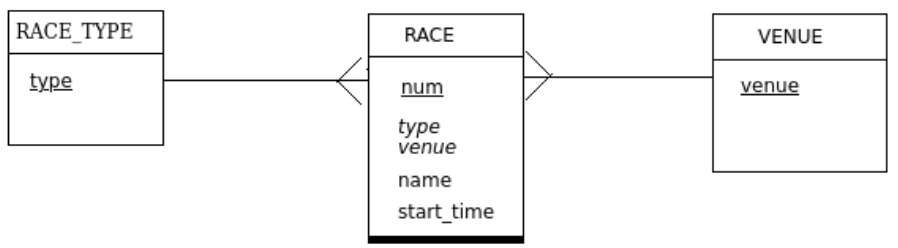

# Define

In [72]:
import sqlite3
conn = sqlite3.connect('RacingDB.db')
conn.execute("PRAGMA foreign_keys = 1")

In [73]:
c = conn.cursor()

In [74]:
# create table RACE_TYPE
c.execute('''
    CREATE TABLE RACE_TYPE(
        Type text PRIMARY KEY
    )
''')

In [75]:
# create table VENUE
c.execute('''
    CREATE TABLE VENUE(
        Venue text PRIMARY KEY
    )
''')

In [76]:
# create table RACE
c.execute('''
    CREATE TABLE RACE(
        R_num number PRIMARY KEY,
        
        Type text,
        Venue text,
        R_name text,
        R_start_time date,
        FOREIGN KEY (Type) REFERENCES RACE_TYPE (Type),
        FOREIGN KEY (Venue) REFERENCES VENUE (Venue)
    )
''')

In [77]:
conn.commit()

# Insert

In [78]:
import pandas as pd

In [79]:
read_race_type = pd.read_csv(r'race_type.csv')
read_race_type.to_sql('RACE_TYPE', conn, if_exists='replace', index=False)

read_venue = pd.read_csv(r'venue.csv')
read_venue.to_sql('VENUE', conn, if_exists='replace', index=False)

In [131]:
read_race = pd.read_csv(r'race.csv')

read_race['R_start_time'] = pd.to_datetime(read_race['R_start_time'], 
                                           format='%d/%m/%Y %H:%M')

read_race.to_sql('RACE', conn, if_exists='replace', index=False)

In [132]:
read_race.dtypes

R_num                    int64
Type                    object
Venue                   object
R_name                  object
R_start_time    datetime64[ns]
dtype: object

In [133]:
conn.commit()

In [134]:
c.execute(
'''
SELECT strftime('%Y %m %d', R_start_time) from Race

'''
).fetchall()

[('2020 12 21',),
 ('2020 12 22',),
 ('2020 12 23',),
 ('2020 12 23',),
 ('2020 12 25',),
 ('2020 12 26',),
 ('2020 12 26',),
 ('2020 12 26',),
 ('2020 12 29',),
 ('2020 12 29',),
 ('2020 12 29',),
 ('2021 01 01',),
 ('2021 01 01',),
 ('2021 01 01',)]